Скачайте датасет House Prices Kaggle со страницы конкурса (https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) и сохраните его в том же каталоге, что и ваш скрипт или блокнот Python.
Загрузите датасет в pandas DataFrame под названием df.
Выполните предварительную обработку данных, выполнив следующие шаги: a. Определите и обработайте отсутствующие значения в датасете. Определите, в каких столбцах есть отсутствующие значения, и решите, как их обработать (например, заполнить средним, медианой или модой, или отбросить столбцы/строки с существенными отсутствующими значениями). b. Проверьте и обработайте любые дублирующиеся строки в датасете. c. Проанализируйте типы данных в каждом столбце и при необходимости преобразуйте их (например, из объектных в числовые типы).
Проведите разведочный анализ данных (EDA), ответив на следующие вопросы: a. Каково распределение целевой переменной 'SalePrice'? Есть ли какие-либо выбросы? b. Исследуйте взаимосвязи между целевой переменной и другими характеристиками. Есть ли сильные корреляции? c. Исследуйте распределение и взаимосвязи других важных характеристик, таких как 'OverallQual', 'GrLivArea', 'GarageCars' и т.д. d. Визуализируйте данные, используя соответствующие графики (например, гистограммы, диаграммы рассеяния, квадратные диаграммы), чтобы получить представление о датасете.
Выполните проектирование признаков путем реализации следующих преобразований: a. Работайте с категориальными переменными, применяя one-hot encoding или label encoding, в зависимости от характера переменной. b. При необходимости создайте новые характеристики, такие как общая площадь или возраст объекта недвижимости, путем объединения существующих характеристик.
Сохраните очищенный и преобразованный набор данных в новый CSV-файл под названием 'cleaned_house_prices.csv'.

In [1]:
import pandas as pd

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv(r"C:\Users\annav\OneDrive\Desktop\HW8_kaggle\train.csv")

# Предварительная обработка данных

In [12]:
# 1. Обработка пропущенных значений
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values = missing_values.sort_values(ascending=False)
print("Пропущенные значения:\n", missing_values)

Пропущенные значения:
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


In [13]:
# Заполнение пропущенных значений медианой (можно изменить на среднее, моду и т.д.)
for column in missing_values.index:
    if df[column].dtype == "object":
        df[column] = df[column].fillna(df[column].mode()[0])
    else:
        df[column] = df[column].fillna(df[column].median())

In [15]:

# 2. Проверка на дубликаты
duplicates = df.duplicated().sum()
print("Дублирующиеся строки:", duplicates)
df = df.drop_duplicates()


Дублирующиеся строки: 0


In [17]:
# 3. Преобразование типов данных
# Преобразуем категориальные переменные в числовые (label encoding)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].astype('category').cat.codes

# Разведочный анализ данных (EDA)

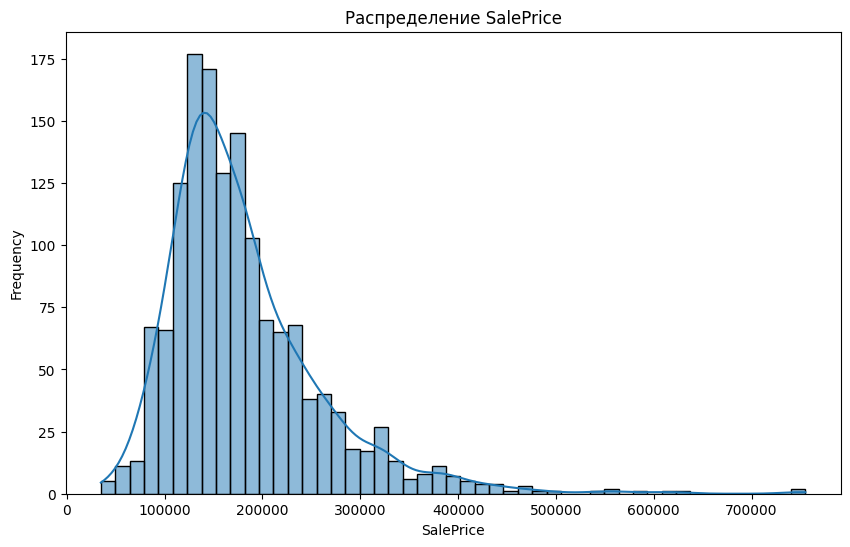

In [20]:
# 1. Распределение целевой переменной 'SalePrice'
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Распределение SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

# 2. Взаимосвязи между целевой переменной и другими характеристиками

In [21]:
# Выбор столбцов, имеющих наибольшую корреляцию с 'SalePrice'
correlation_matrix = df.corr()
corr_with_target = correlation_matrix['SalePrice'].sort_values(ascending=False)
high_corr_features = corr_with_target[abs(corr_with_target) > 0.5].index

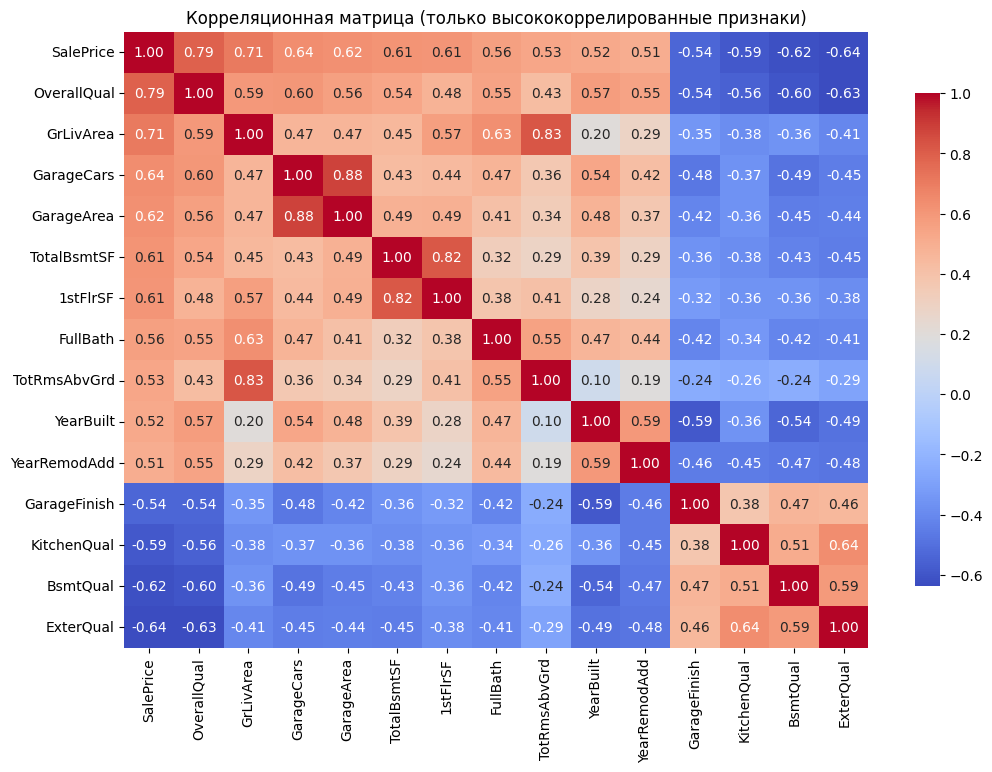

In [22]:
# Ограниченная корреляционная матрица
plt.figure(figsize=(12, 8))
sns.heatmap(df[high_corr_features].corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'shrink': .8}, annot_kws={"size": 10})
plt.title('Корреляционная матрица (только высококоррелированные признаки)')
plt.show()

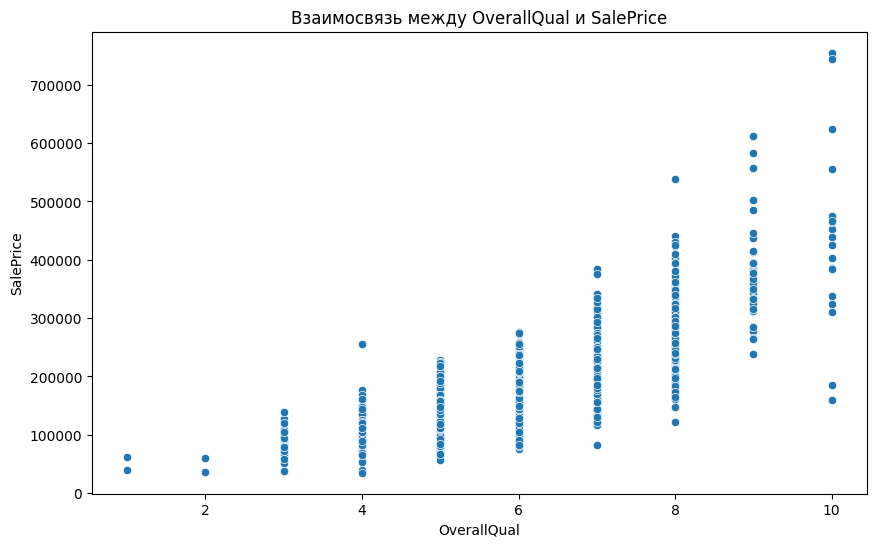

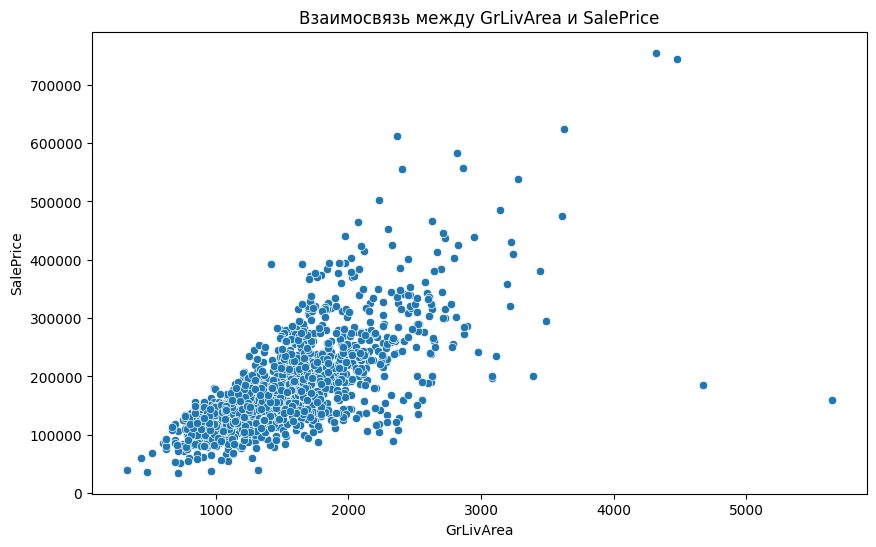

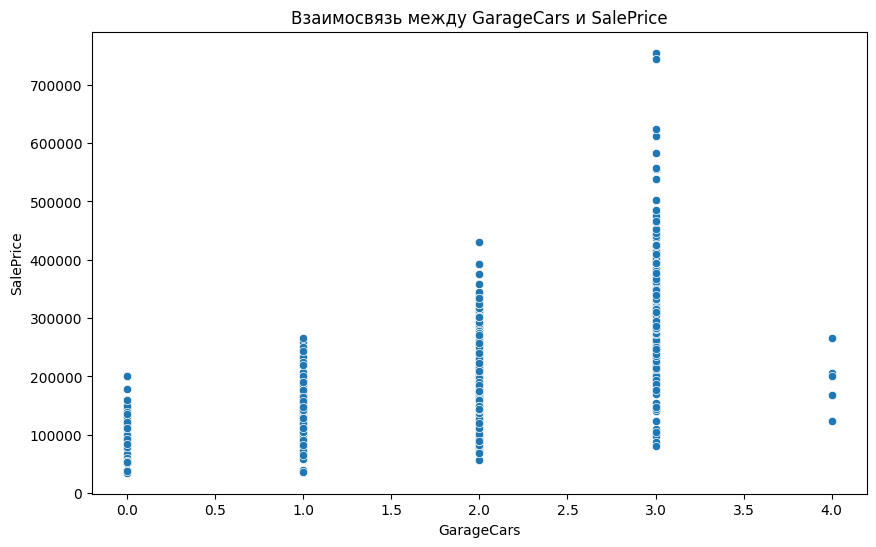

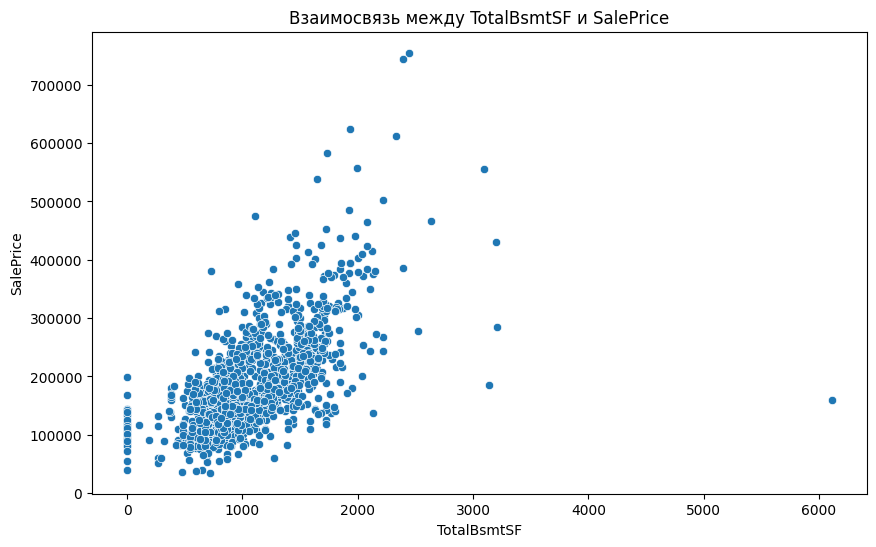

In [23]:
# 3. Визуализация некоторых важных характеристик
important_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']
for feature in important_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[feature], y=df['SalePrice'])
    plt.title(f'Взаимосвязь между {feature} и SalePrice')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

# Проектирование признаков

In [24]:
# 1. One-hot encoding для категориальных переменных
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [25]:
# 2. Создание новых характеристик
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df['Age'] = df['YrSold'] - df['YearBuilt']


In [27]:
# Сохранение очищенного и преобразованного набора данных
output_path = r"C:\Users\annav\OneDrive\Desktop\HW8\cleaned_house_prices.csv"
df.to_csv(output_path, index=False)
print(f"Очищенный и преобразованный набор данных сохранен в '{output_path}'")

Очищенный и преобразованный набор данных сохранен в 'C:\Users\annav\OneDrive\Desktop\HW8\cleaned_house_prices.csv'


In [28]:
# Печать первых 5 строк датасета
print(df.head())

   Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0   1          60         3         65.0     8450       1      0         3   
1   2          20         3         80.0     9600       1      0         3   
2   3          60         3         68.0    11250       1      0         0   
3   4          70         3         60.0     9550       1      0         0   
4   5          60         3         84.0    14260       1      0         0   

   LandContour  Utilities  ...  Fence  MiscFeature  MiscVal  MoSold  YrSold  \
0            3          0  ...      2            2        0       2    2008   
1            3          0  ...      2            2        0       5    2007   
2            3          0  ...      2            2        0       9    2008   
3            3          0  ...      2            2        0       2    2006   
4            3          0  ...      2            2        0      12    2008   

   SaleType  SaleCondition  SalePrice  TotalSF  Age  
0 